In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [123]:
#importing the excel file
df=pd.read_excel("Desktop\Customer_retention.xlsx")

In [124]:
#displaying the top 5 data of the data set
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


##### Exploratory Data Analysis

In [125]:
#checking shape of data set
df.shape

(269, 71)

Our data set has 269 rows and 71 columns

checking for null values

###### Identifying the Null values

In [126]:
df.isna().any()

1Gender of respondent                                                   False
2 How old are you?                                                      False
3 Which city do you shop online from?                                   False
4 What is the Pin Code of where you shop online from?                   False
5 Since How Long You are Shopping Online ?                              False
                                                                        ...  
Longer delivery period                                                  False
Change in website/Application design                                    False
Frequent disruption when moving from one page to another                False
Website is as efficient as before                                       False
Which of the Indian online retailer would you recommend to a friend?    False
Length: 71, dtype: bool

Great our data set does not have any null values to proceed further let us check the statistics of our data set using describe() function.

In [127]:
df.describe()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,...,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,...,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773
min,0.000000,1.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Great our data set does not have any null or missing values let us check the data types of all the columns

In [128]:
df.dtypes

1Gender of respondent                                                    int64
2 How old are you?                                                       int64
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                               int64
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

Our data set has both the combination of Continuous(Integer) variables and Categorical variables so in order to process our data we need to convert all the Categorical variables in to integer variables using Encoding Techniques in further process.

Before that let us check whether we have any special charecters that need to be replaced in our data set first checking for spaces and then for any ? Symbols.

In [129]:
for i in df.columns:
    print(i,df.loc[df[i]==" ",i].size)

1Gender of respondent 0
2 How old are you?  0
3 Which city do you shop online from? 0
4 What is the Pin Code of where you shop online from? 0
5 Since How Long You are Shopping Online ? 0
6 How many times you have made an online purchase in the past 1 year? 0
7 How do you access the internet while shopping on-line? 0
8 Which device do you use to access the online shopping? 0
9 What is the screen size of your mobile device?						                                         0
10 What is the operating system (OS) of your device?				                                           0
11 What browser do you run on your device to access the website?			                                                           0
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    0
13 After first visit, how do you reach the online retail store?				                                                    0
14 How much tim

So there are no empty spaces in our data set similarly we will check for ? symbols in our data set

In [130]:
for i in df.columns:
    print(i,df.loc[df[i]=="?",i].size)

1Gender of respondent 0
2 How old are you?  0
3 Which city do you shop online from? 0
4 What is the Pin Code of where you shop online from? 0
5 Since How Long You are Shopping Online ? 0
6 How many times you have made an online purchase in the past 1 year? 0
7 How do you access the internet while shopping on-line? 0
8 Which device do you use to access the online shopping? 0
9 What is the screen size of your mobile device?						                                         0
10 What is the operating system (OS) of your device?				                                           0
11 What browser do you run on your device to access the website?			                                                           0
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    0
13 After first visit, how do you reach the online retail store?				                                                    0
14 How much tim

Great our data set does not have any ? Values so we can proceed further.

In [131]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


Before proceeding further let us convert the categorical in to numerical for doing better analysis using encoding techniques.

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
data=df.copy()

In [134]:
data=data.apply(LabelEncoder().fit_transform)

In [135]:
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,2,2,1,4,3,2,2,2,0,...,0,0,3,5,0,3,2,0,0,6
1,1,1,2,5,4,4,0,0,0,2,...,1,6,7,10,7,5,0,4,1,3
2,1,1,4,23,3,4,1,0,1,1,...,7,6,4,7,0,3,5,6,0,5
3,0,1,6,11,3,0,1,0,1,2,...,9,7,4,8,5,3,1,1,2,1
4,1,1,0,31,2,1,0,0,0,2,...,5,8,5,8,7,3,0,7,6,3


so we successfully converted all our data columns in to numericals.

In [136]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In the above output we displayed all the columns in our data set.

From the above data set the columns How do you access the internet while shopping on-line,Which device do you use to access the online shopping,
Shopping on the website helps you fulfill certain roles
are not necessary to infulence the factors of online shopping so we can drop off those columns.

In [137]:
columns=['7 How do you access the internet while shopping on-line?','8 Which device do you use to access the online shopping?',
         '46 Shopping on the website helps you fulfill certain roles']

In [138]:
data.drop(columns,axis=1,inplace=True)

In [140]:
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,2,2,1,4,3,2,0,0,0,...,0,0,3,5,0,3,2,0,0,6
1,1,1,2,5,4,4,0,2,0,0,...,1,6,7,10,7,5,0,4,1,3
2,1,1,4,23,3,4,1,1,0,0,...,7,6,4,7,0,3,5,6,0,5
3,0,1,6,11,3,0,1,2,1,0,...,9,7,4,8,5,3,1,1,2,1
4,1,1,0,31,2,1,0,2,1,1,...,5,8,5,8,7,3,0,7,6,3


After removing the Unnecessary columns this is how our data set look likes

In [142]:
data.shape

(269, 68)

After dropping the unnecessary columns we have 269 rows and 68 columns in our data set

To check the further unwanted columns let us plot a heat map to remove unnecessary columns

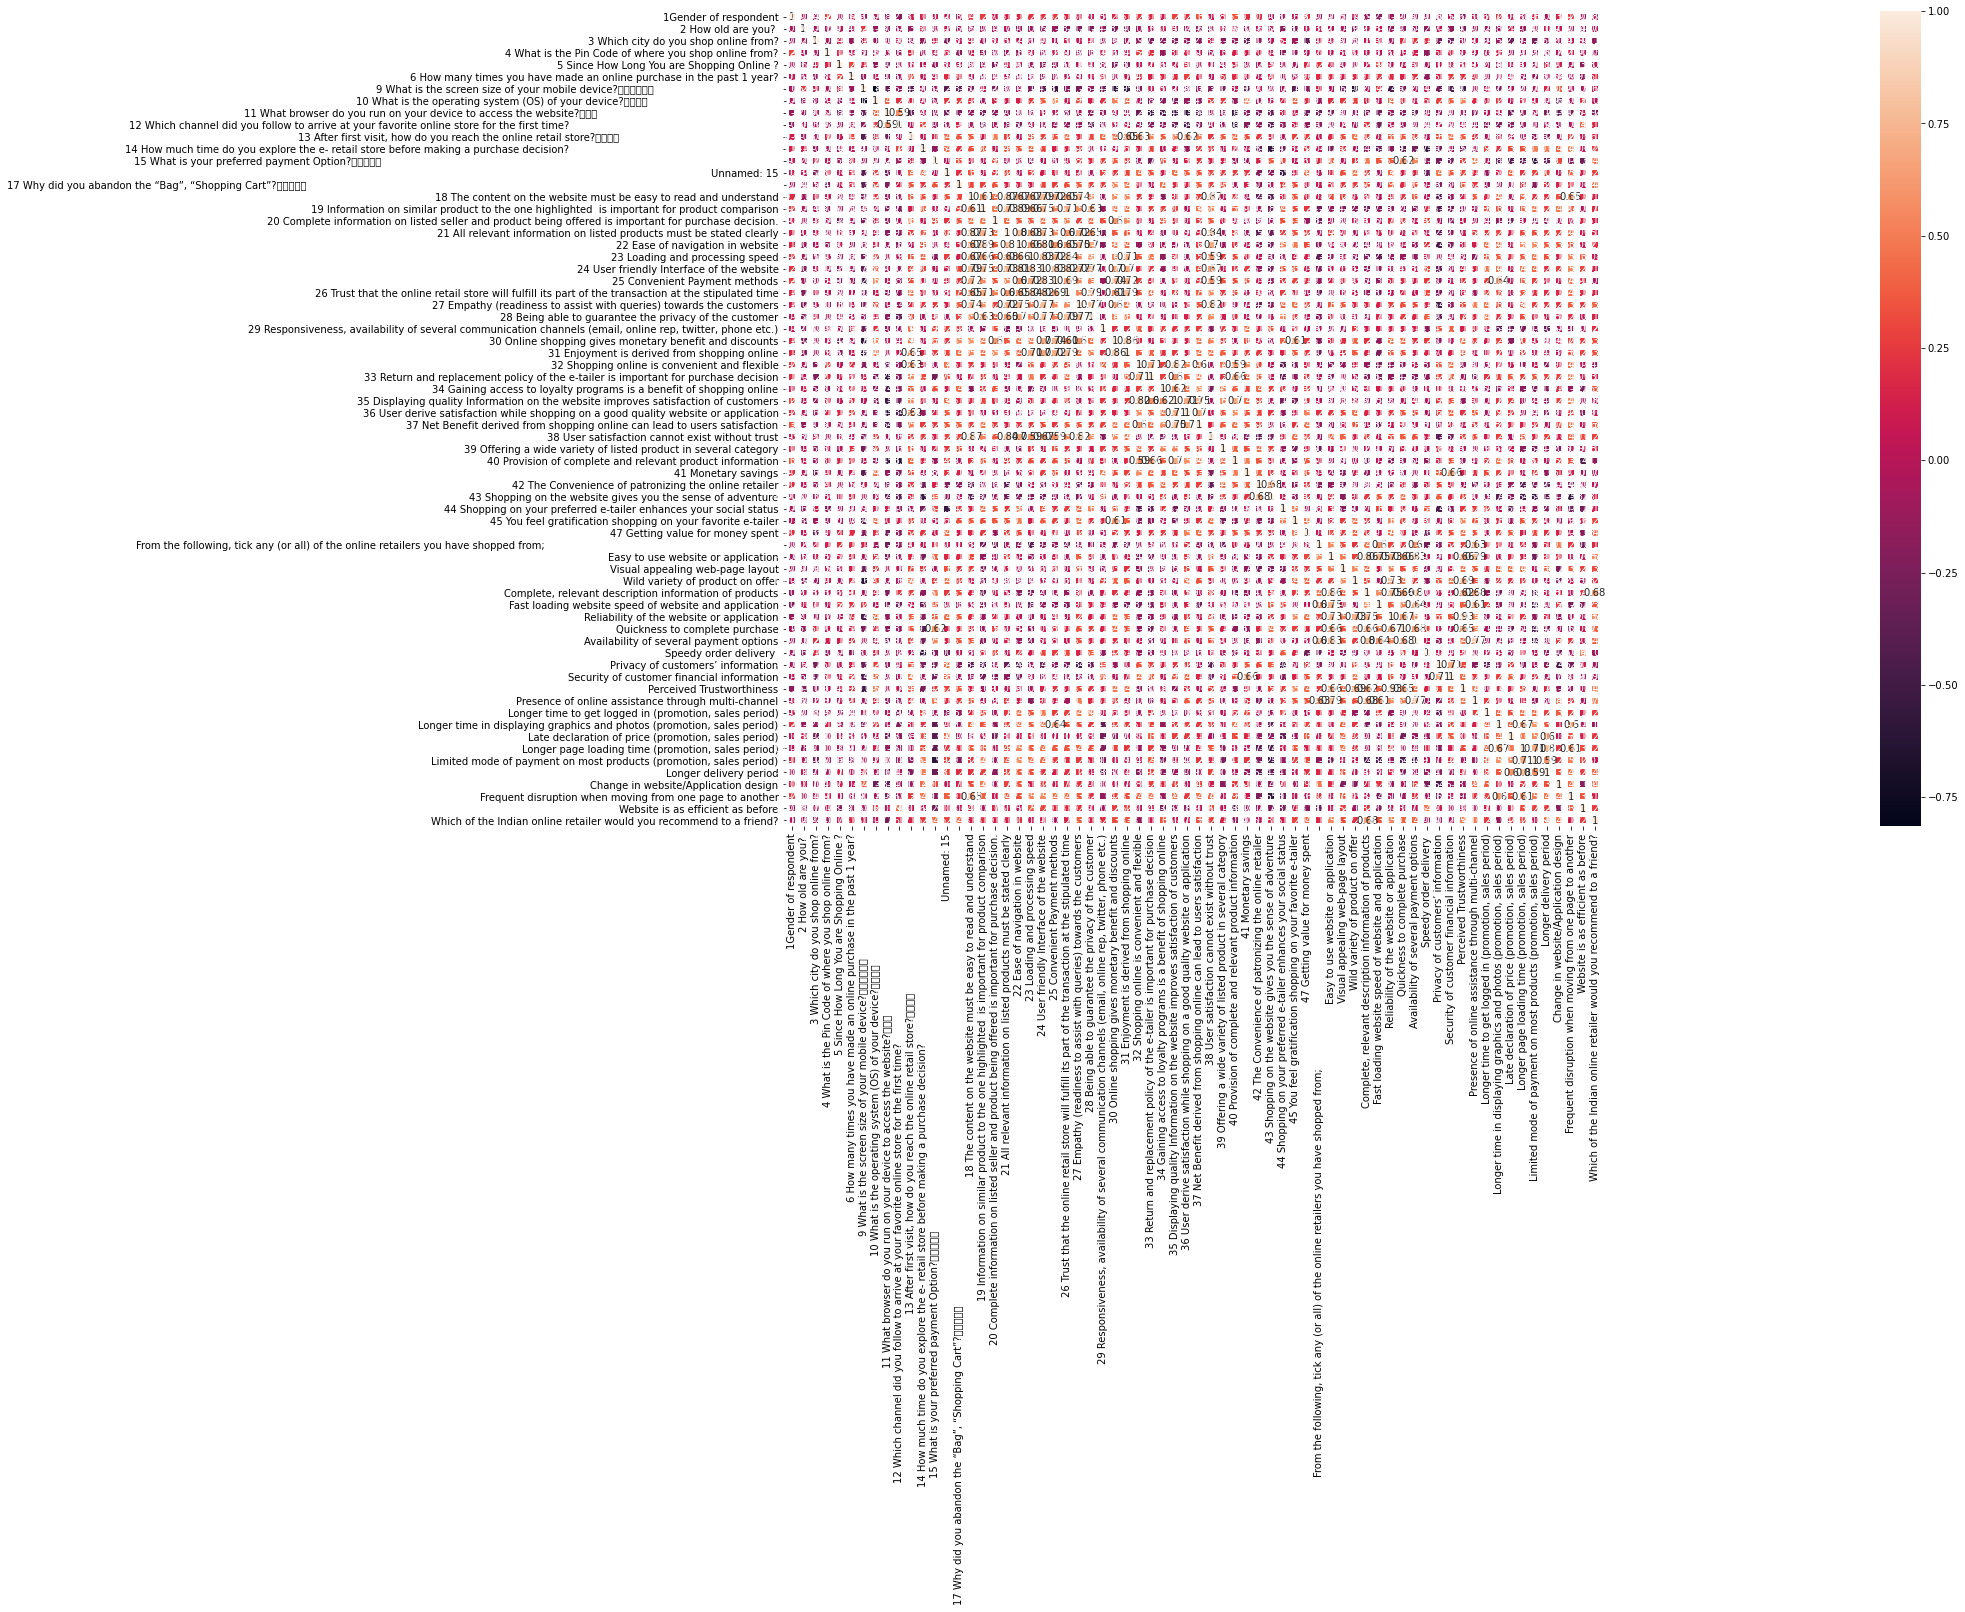

In [155]:
plt.figure(figsize=(100,15))
heat=sns.heatmap(data.corr(),linewidth=5,square=True,annot=True)

Let us check for outliers in our data set for this let us use box plots

Outlier checking

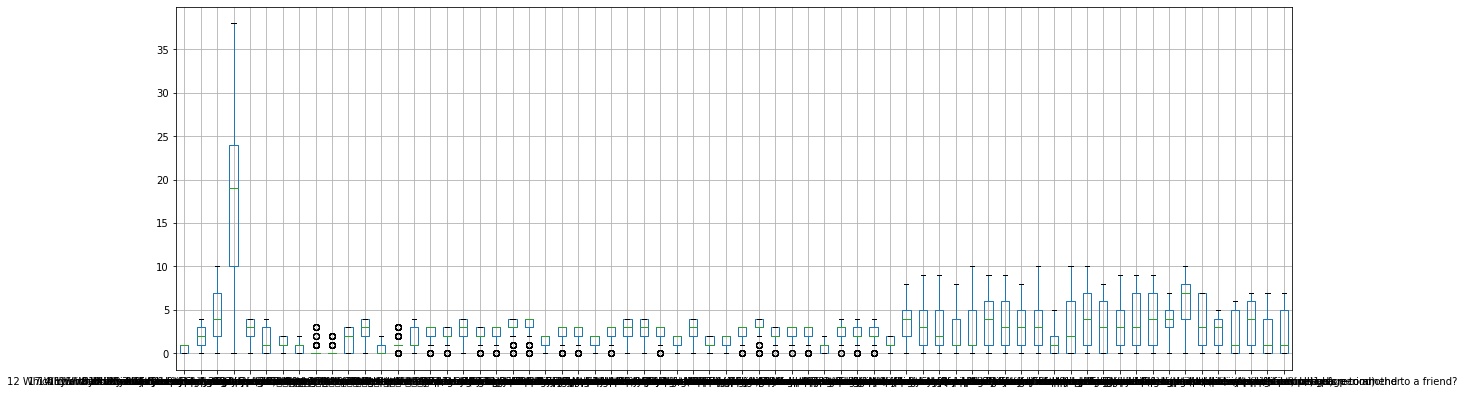

In [156]:
data.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As our dataset has we do not remove outliers

In [157]:
data.skew()

1Gender of respondent                                                  -0.723007
2 How old are you?                                                      0.063243
3 Which city do you shop online from?                                   0.313729
4 What is the Pin Code of where you shop online from?                   0.114537
5 Since How Long You are Shopping Online ?                             -0.554705
                                                                          ...   
Longer delivery period                                                 -0.147702
Change in website/Application design                                    0.354163
Frequent disruption when moving from one page to another               -0.100608
Website is as efficient as before                                       0.662084
Which of the Indian online retailer would you recommend to a friend?    0.583614
Length: 68, dtype: float64

As data is categorical we wont remove the skewness as well

array([[<AxesSubplot:title={'center':'1Gender of respondent'}>,
        <AxesSubplot:title={'center':'2 How old are you? '}>,
        <AxesSubplot:title={'center':'3 Which city do you shop online from?'}>,
        <AxesSubplot:title={'center':'4 What is the Pin Code of where you shop online from?'}>,
        <AxesSubplot:title={'center':'5 Since How Long You are Shopping Online ?'}>,
        <AxesSubplot:title={'center':'6 How many times you have made an online purchase in the past 1 year?'}>,
        <AxesSubplot:title={'center':'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '}>,
        <AxesSubplot:title={'center':'10 What is the operating system (OS) of your device?\t\t\t\t                                          '}>],
       [<AxesSubplot:title={'center':'11 What browser do you run on your device to access the website?\t\t\t                                                          '}>,
        <AxesSubplot:title={'center':'12 

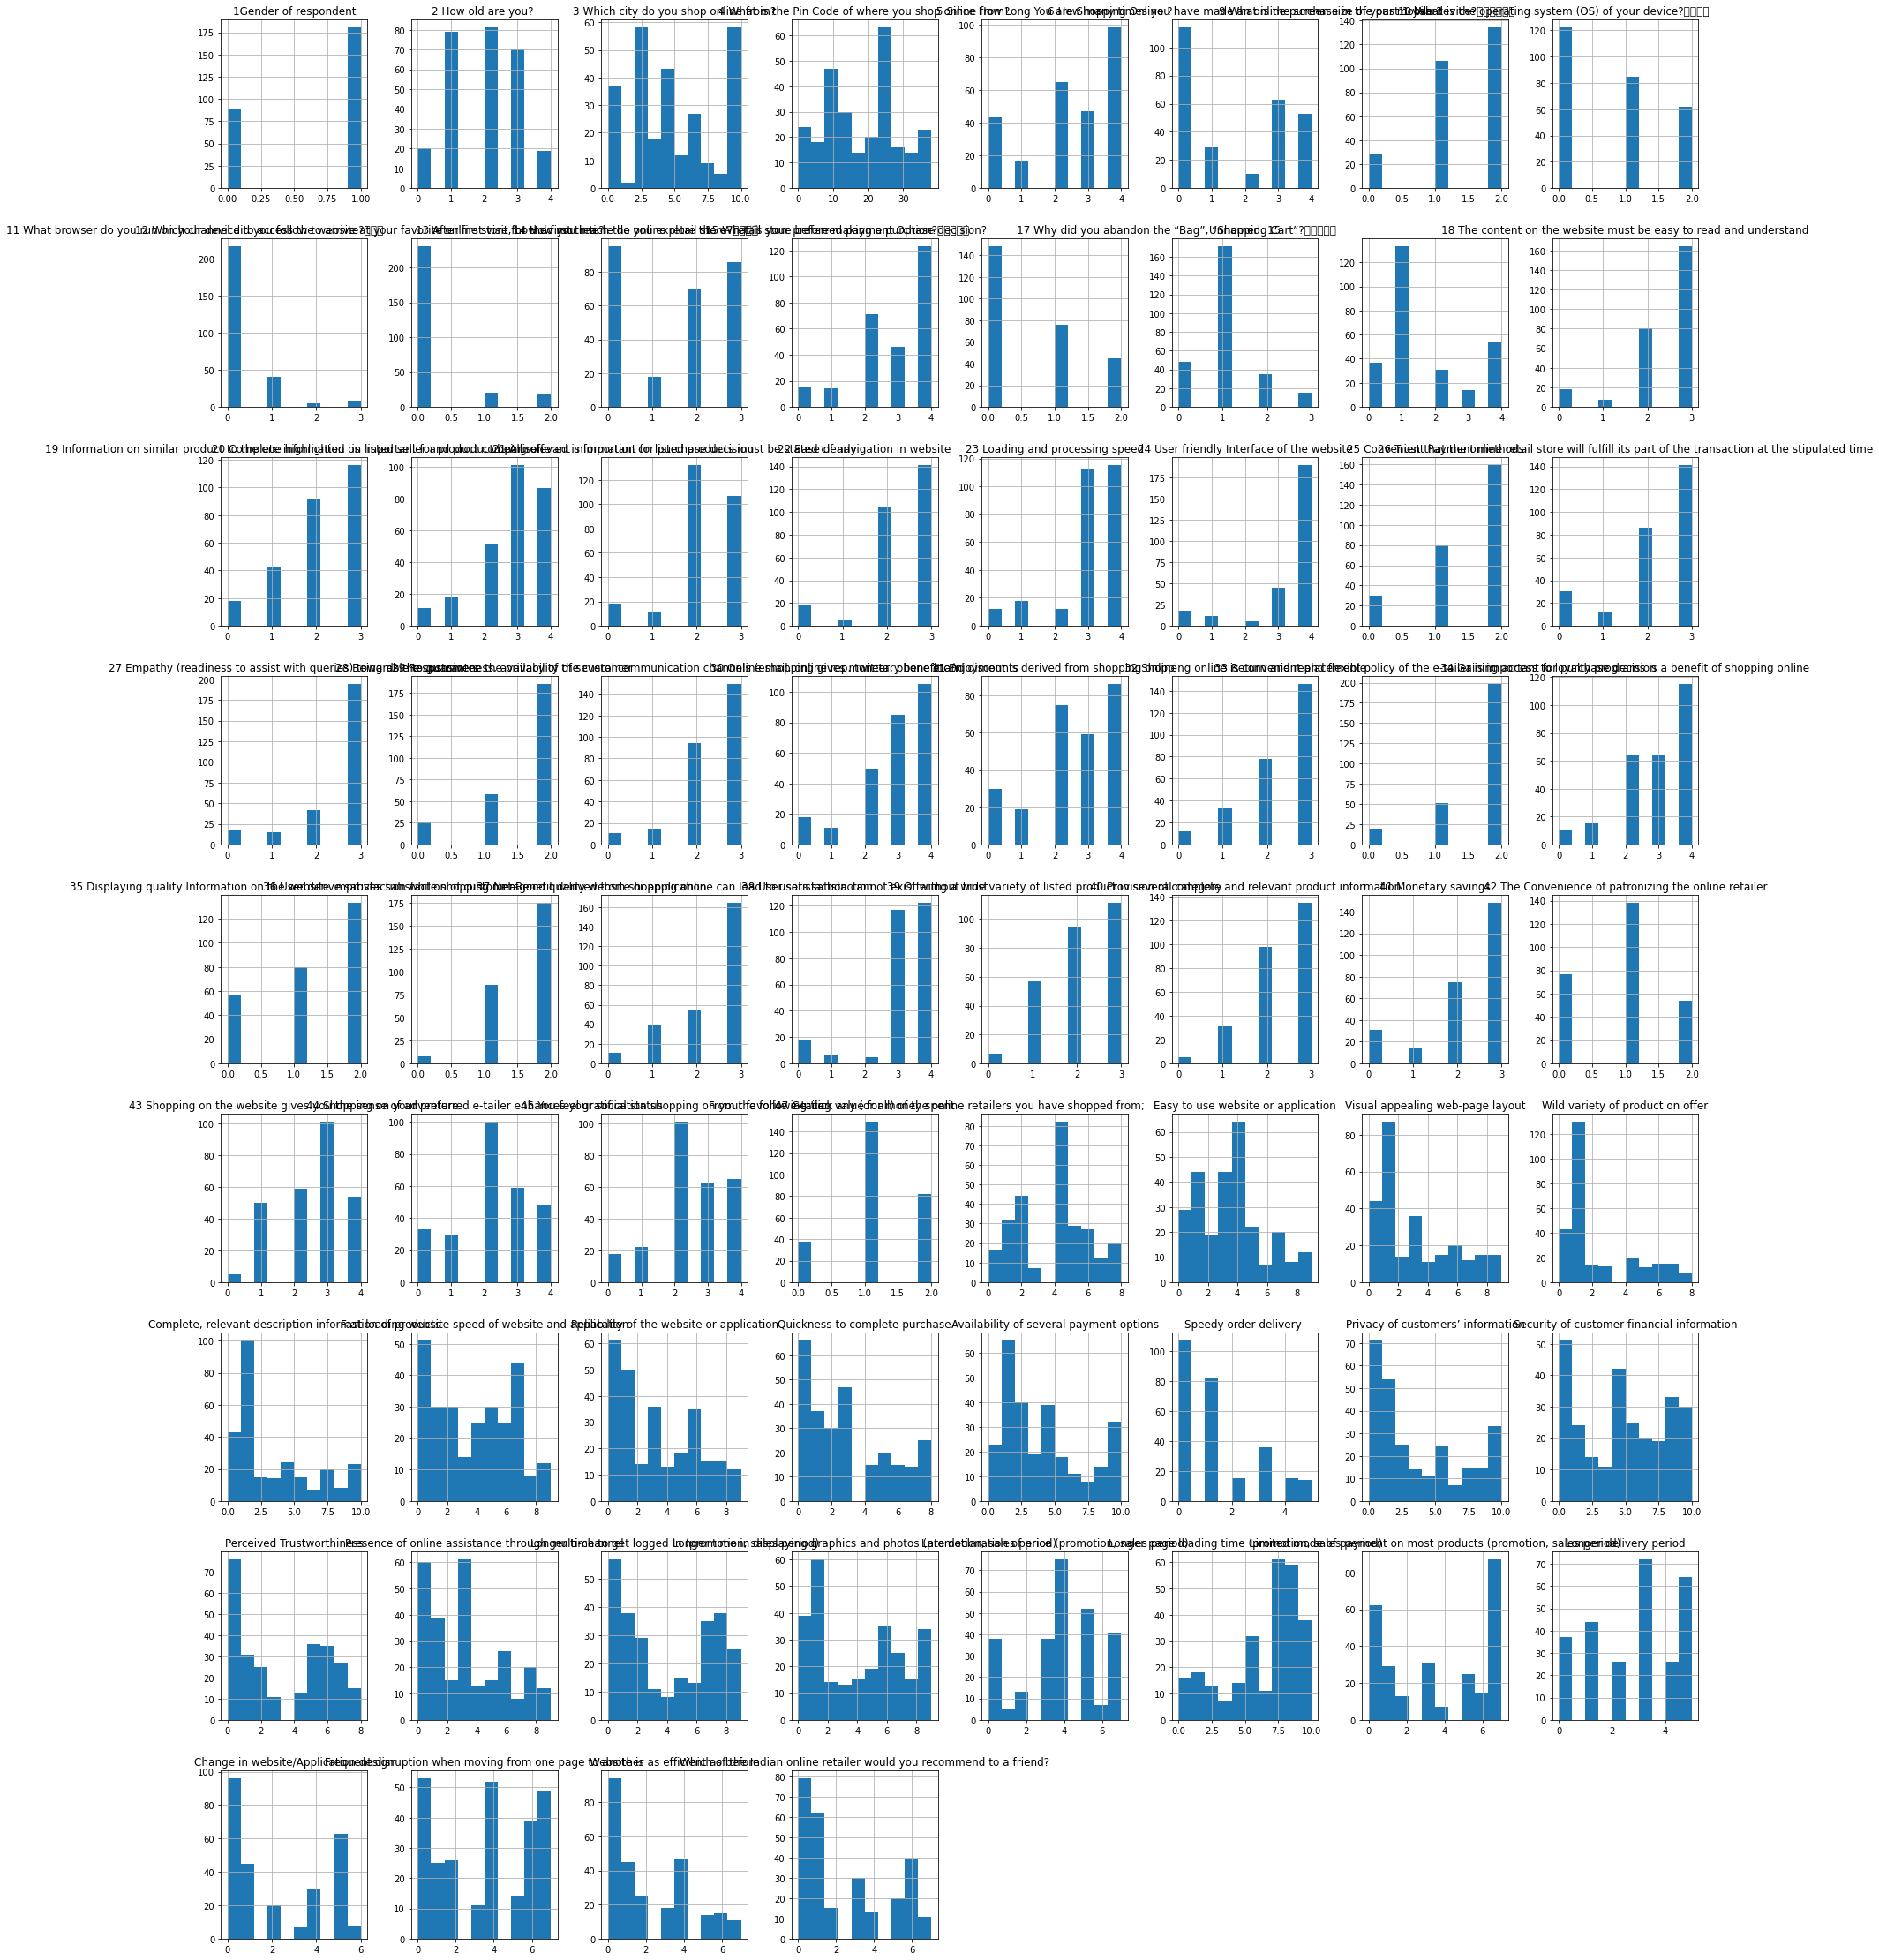

In [159]:
data.hist(figsize=(30,40))

The above output gives the distribution of all the columns and we can see that most of the columns are evenly distributed.
So after cleaning the data and doing the visualization we are with 269,68 columns to predict a model.

Result:

By using these 269 rows and 68 columns we will predict our model.